In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

In [19]:
learning_rate=.01
epochs=200

In [20]:
n_samples=30
train_x=np.linspace(0,20,n_samples)
train_y=3*train_x+4*np.random.rand(n_samples)

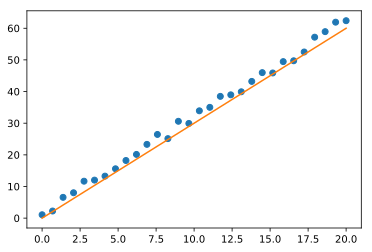

In [21]:
plt.plot(train_x,train_y,'o')
plt.plot(train_x,3*train_x)
plt.show()

In [22]:
X=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

W=tf.Variable(np.random.randn(), name='weights')
B=tf.Variable(np.random.randn(), name='bias')

In [23]:
#pred=X*W+B
pred=tf.add(tf.multiply(X,W),B)
cost=tf.reduce_sum((pred-Y)**2/(2*n_samples))

In [24]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [25]:
init=tf.global_variables_initializer()

 e 0 c 67.23847961425781 w2.1845240592956543 b -0.2894873321056366
 e 20 c 1.0092015266418457 w3.1503682136535645 b -0.1204192042350769
 e 40 c 0.9723962545394897 w3.145062208175659 b -0.03802356496453285
 e 60 c 0.9391875267028809 w3.140026092529297 b 0.04018184542655945
 e 80 c 0.9092199802398682 w3.1352462768554688 b 0.11441068351268768
 e 100 c 0.8821760416030884 w3.130708932876587 b 0.18486495316028595
 e 120 c 0.8577669858932495 w3.1264030933380127 b 0.2517363727092743
 e 140 c 0.835735559463501 w3.1223156452178955 b 0.3152068555355072
 e 160 c 0.8158467411994934 w3.118436336517334 b 0.3754502832889557
 e 180 c 0.7978910207748413 w3.1147537231445312 b 0.432630330324173


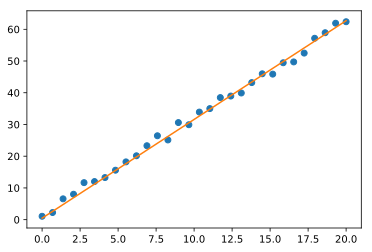

In [29]:
with tf.Session() as sesh:
    sesh.run(init)
    for epoch in range(epochs):
        for x,y in zip(train_x,train_y):
            sesh.run(optimizer,feed_dict={X:x,Y:y})
        if not epoch%20:
            c=sesh.run(cost,feed_dict={X:train_x,Y:train_y})
            w=sesh.run(W)
            b=sesh.run(B)
            print(' e {} c {} w{} b {}'.format(epoch,c,w,b))
            #print(f'epoch:{epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}'.format(epoch,c,w,b))
    weight=sesh.run(W)
    bias=sesh.run(B)
    plt.plot(train_x,train_y,'o')
    plt.plot(train_x,weight*train_x+bias)
    plt.show()